In [36]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from scipy import signal

# Setting up the 1D data and template

In [128]:
nside = 32

map1D = np.zeros(12*nside**2)
map1D[1000] = 1
map1D[10000] = 0.5

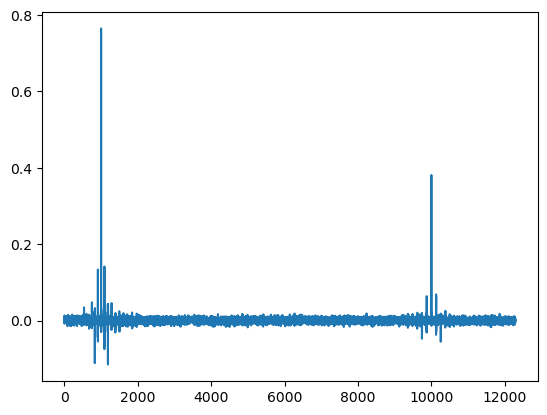

In [264]:
smooth_1d = hp.smoothing(map1D) + 5e-3*np.random.randn(len(map1D))
plt.plot(smooth_1d)

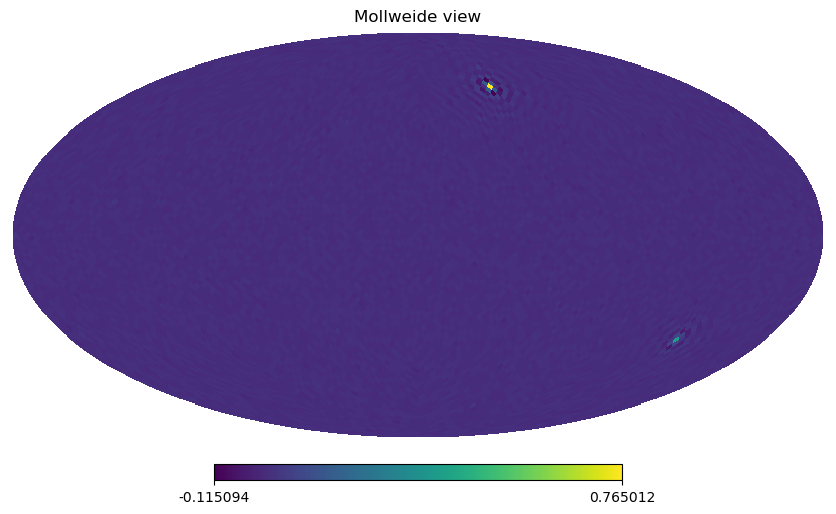

In [265]:
hp.mollview(smooth_1d)

In [266]:
template = np.zeros_like(map1D)
template[len(template)//2] = 1
smooth_template = hp.smoothing(template)

Text(0.5, 1.0, 'template')

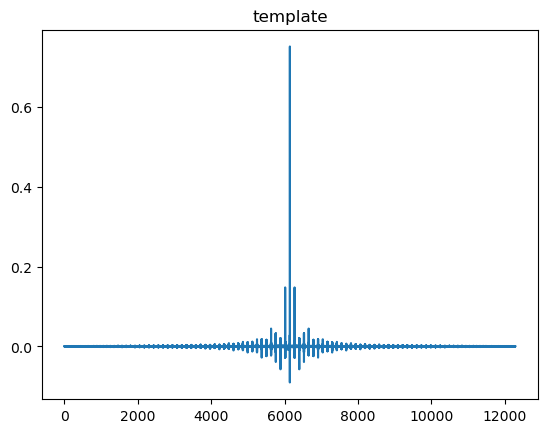

In [267]:
plt.plot(smooth_template)
plt.title('template')

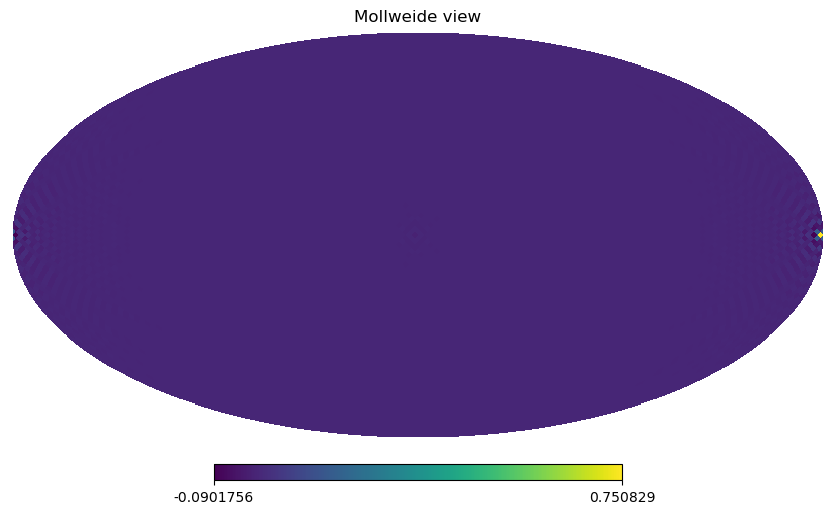

In [268]:
hp.mollview(smooth_template)

# Looking at noise properties

In [269]:
def smooth_vector(vec, sig):
    n=len(vec)
    x=np.arange(n)
    x[n//2:]=x[n//2:]-n
    kernel=np.exp(-0.5*x**2/sig**2) #make a Gaussian kernel
    kernel=kernel/kernel.sum()
    vecft=np.fft.rfft(vec)
    kernelft=np.fft.rfft(kernel)
    vec_smooth=np.fft.irfft(vecft*kernelft) #convolve the data with the kernel
    return vec_smooth

In [270]:
Ninv_smoothing_sigma = 10
x = np.linspace(-np.pi/2,np.pi/2,len(smooth_1d))
win = signal.windows.tukey(len(x))
ps = np.abs(np.fft.fft(smooth_1d * win))**2
ps_smooth=smooth_vector(ps, Ninv_smoothing_sigma)
Ninv=1/ps_smooth

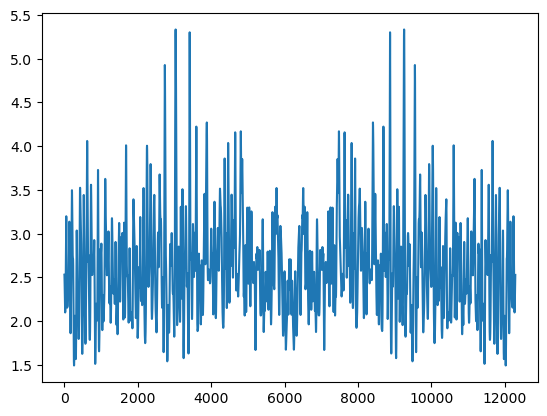

In [271]:
plt.plot(Ninv)

In [272]:
## Step 6: Preparing template for mf
print('whitening template')
template_ft = np.fft.fft(template*win)
template_ft_white = template_ft * np.sqrt(Ninv)

## Step 6: Preparing data for mf
print('whitening data')
data_ft = np.fft.fft(smooth_1d*win)
data_ft_white = data_ft * np.sqrt(Ninv)

## Step 7: Computing matched filter
print('computing mf')
rhs = np.real(np.fft.ifft(data_ft_white * np.conj(template_ft_white)))
lhs = np.real(template_ft_white.T @ template_ft_white)
mf = rhs / lhs

whitening template
whitening data
computing mf


In [273]:
peaks, _ = signal.find_peaks(mf/np.max(mf), height=0.5)

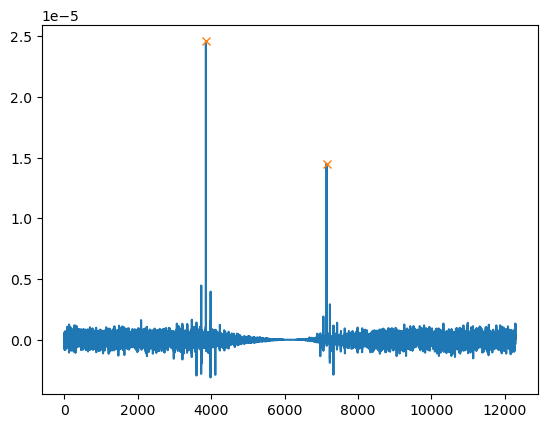

In [274]:
plt.plot(mf)
plt.plot(peaks, mf[peaks], "x")

In [275]:
peaks

array([3856, 7144])

In [276]:
peaks_data, _ = signal.find_peaks(smooth_1d/np.max(smooth_1d), height=0.5)
peaks_data

array([1000])

In [277]:
peaks_temp, _ = signal.find_peaks(smooth_template/np.max(smooth_template), height=0.5)
peaks_temp

array([6144])

In [278]:
6144 + 3856

10000

In [279]:
6144 + 7144

13288

In [280]:
smooth_1d.shape[0] - 13288

-1000